In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [3]:
f.cd("clustersAndCoincidences")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder

In [4]:
f.cd("farline")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectory

In [5]:
f.cd("clusterCompare")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectory

---

# Let's start by comparing the wiggle plots

In [6]:
w1 = f.Get("farline").Get("allCaloWiggle").Clone("w1")
w1.SetTitle("Full Islands")
w2 = f.Get("farlineTrunc").Get("allCaloWiggle").Clone("w2")
w2.SetTitle("Truncated Islands")
w2.SetLineColor(2)

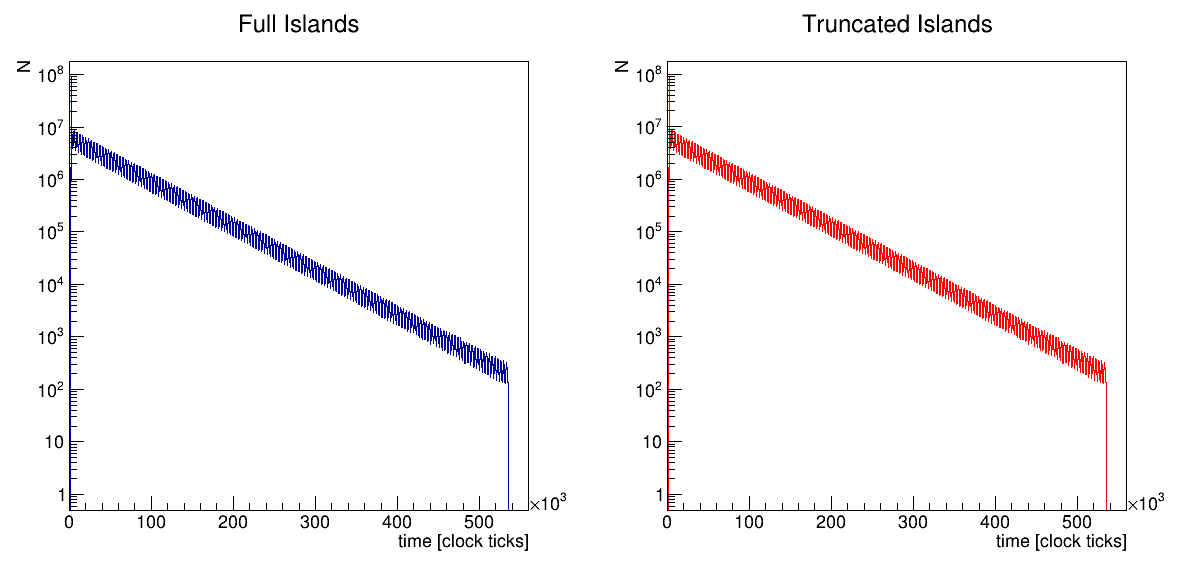

In [7]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
w1.Draw()
r.gPad.SetLogy()

c.cd(2)
#w1.GetXaxis().SetRangeUser(24000,70000)
w2.Draw("")
r.gPad.SetLogy()

c.Draw()

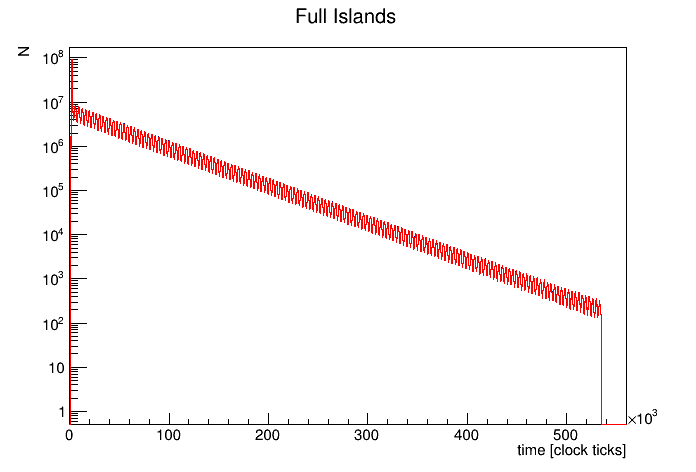

In [8]:
c = r.TCanvas()
w1.Draw()
#w1.GetXaxis().SetRangeUser(24000,70000)
w2.Draw("same")
c.SetLogy()
c.Draw()

In [9]:
wdiff = w1.Clone("wdiff")
wdiff.GetXaxis().UnZoom()
wdiff.Add(w2,-1)
wdiff.SetTitle("Wiggle_{full islands} - Wiggle_{truncated islands}; Time [c.t.]; N")

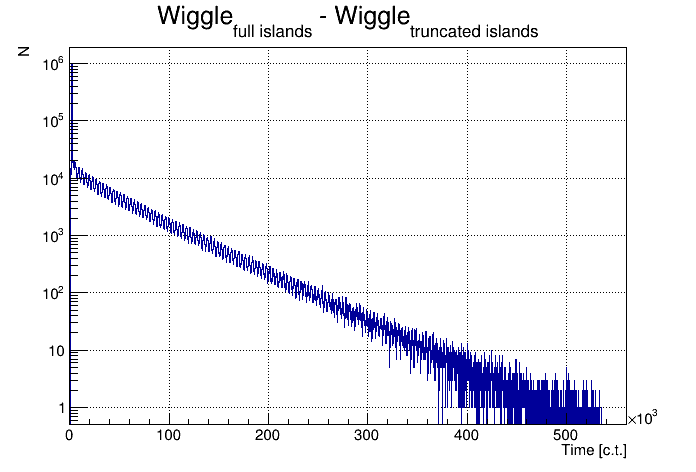

In [10]:
c = r.TCanvas()
wdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

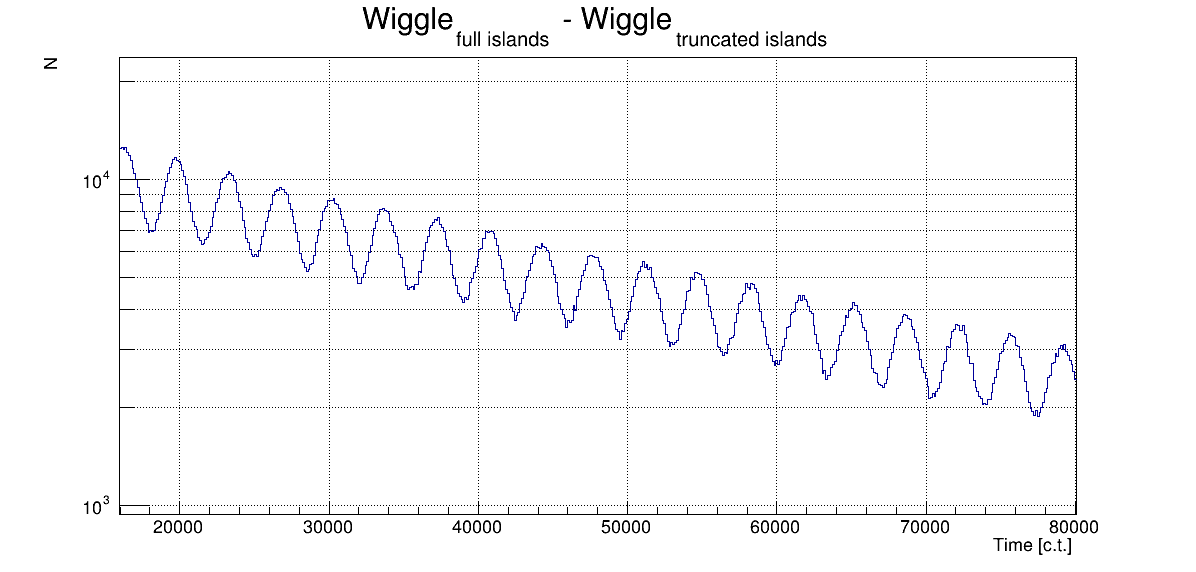

In [11]:
c = r.TCanvas("c","c",1200,600)
wdiff.GetXaxis().SetRangeUser(20*1000/1.25,100*1000/1.25)
wdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

In [12]:
tMin = 30*1000/1.25
print(wdiff.Integral(), "/", wdiff.Integral(wdiff.FindBin(tMin),-1))

2771324.0 / 3159718.0


---

# Energy

In [13]:
e1 = f.Get("farline").Get("allCaloEnergies").Clone("e1")
e2 = f.Get("farlineTrunc").Get("allCaloEnergies").Clone("e2")
e2.SetLineColor(2)

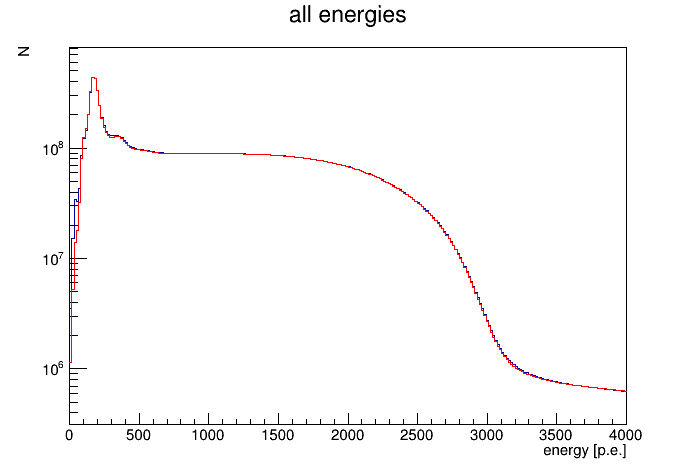

In [14]:
c = r.TCanvas()
e1.Draw()
e1.GetXaxis().SetRangeUser(0,4000)
e2.Draw("same")
c.SetLogy()
c.Draw()

In [15]:
ediff = e1.Clone("ediff")
ediff.Add(e2,-1)
ediff.SetTitle("E_{full islands} - E_{truncated islands} [MeV]; Energy [MeV]; N")

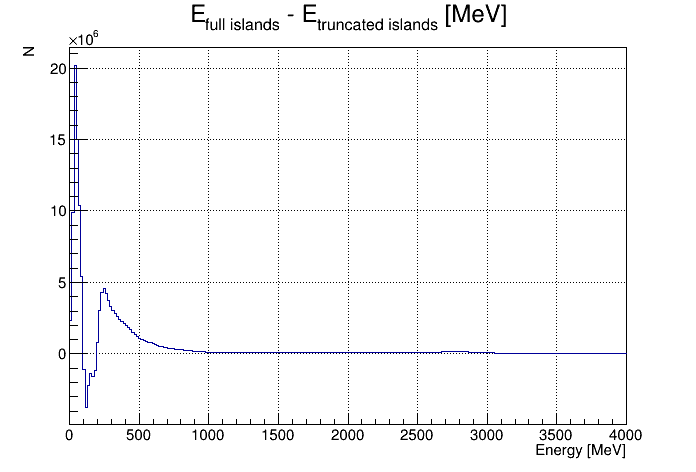

In [16]:
c = r.TCanvas()
ediff.GetXaxis().SetRangeUser(0,4000)
ediff.Draw()
c.SetGrid()
c.Draw()

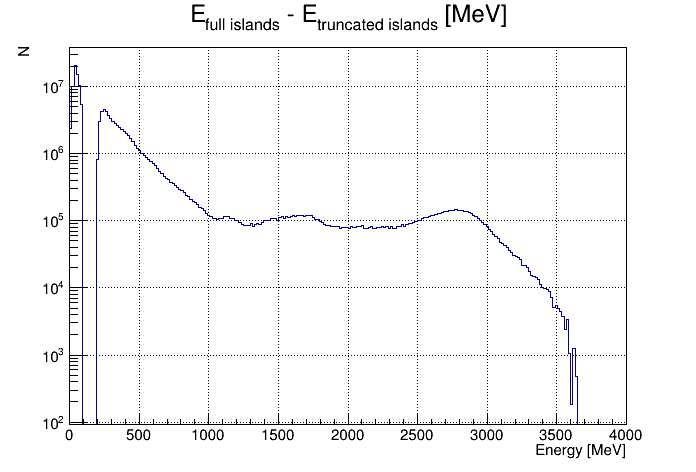

In [17]:
c = r.TCanvas()
ediff.GetXaxis().SetRangeUser(0,4000)
ediff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

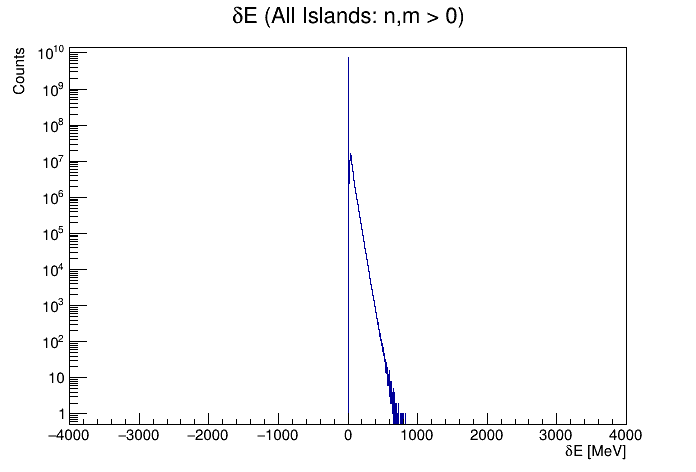

In [18]:
evwDeltaEAll = f.Get("clusterCompare").Get("evwDeltaEAll").Clone()
c = r.TCanvas()
evwDeltaEAll.Draw()
c.SetLogy()
c.Draw()

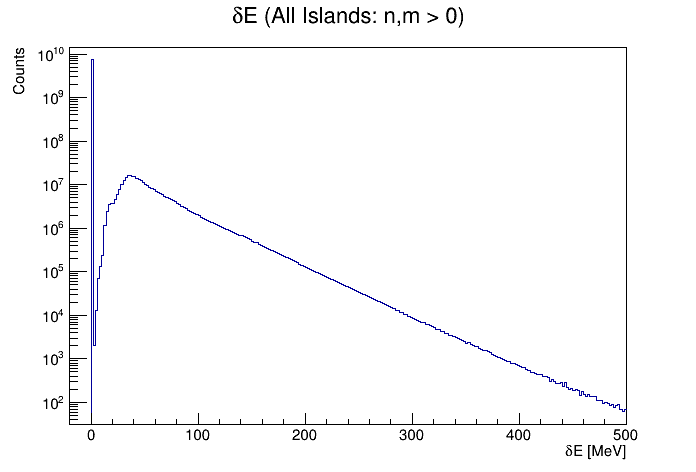

In [19]:
evwDeltaEAll.GetXaxis().SetRangeUser(-20,500)
evwDeltaEAll.Draw()
c.SetLogy()
c.Draw()

---

# All times, no energy cut

In [20]:
t1 = f.Get("farline").Get("allCaloTimes").Clone("t1")
t2 = f.Get("farlineTrunc").Get("allCaloTimes").Clone("t2")
t2.SetLineColor(2)

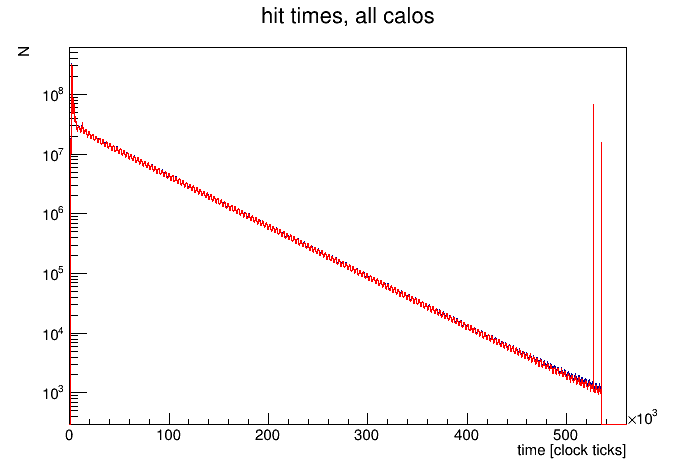

In [21]:
c = r.TCanvas()
t1.Draw()
#e1.GetXaxis().SetRangeUser(24000,70000)
t2.Draw("same")
c.SetLogy()
c.Draw()

In [22]:
tdiff = t1.Clone("ediff")
tdiff.Add(t2,-1)
tdiff.SetTitle("t_{full islands} - t_{truncated islands} [c.t.]; Time in Fill [c.t.]; N")

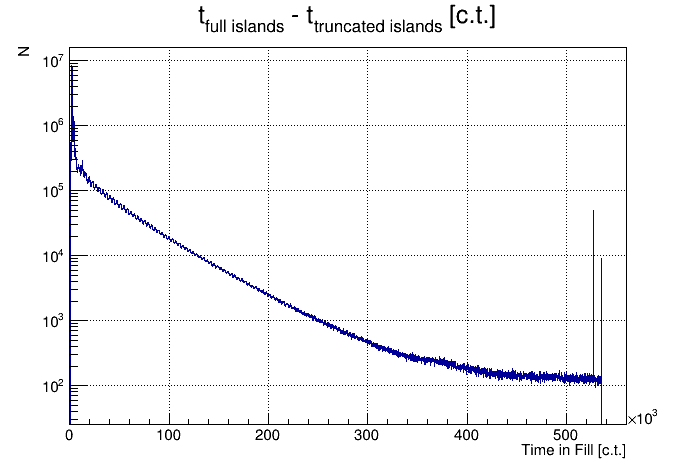

In [23]:
c = r.TCanvas()
tdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

---

# CTAG

In [24]:
ctag1 = f.Get("farline").Get("farlineCTag").Clone("ctag1")
ctag2 = f.Get("farlineTrunc").Get("farlineCTag").Clone("ctag2")
ctag2.SetLineColor(2)

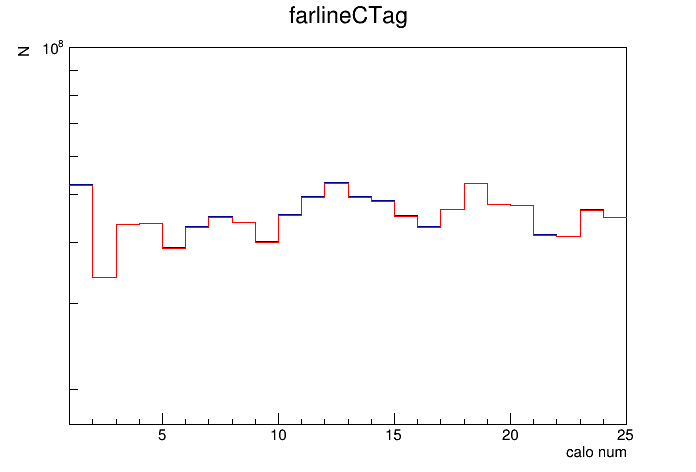

In [25]:
c = r.TCanvas()
ctag1.Draw()
#e1.GetXaxis().SetRangeUser(24000,70000)
ctag2.Draw("same")
c.SetLogy()
c.Draw()

In [26]:
ctagdiff = ctag1.Clone("ctagdiff")
ctagdiff.Add(ctag2,-1)
ctagdiff.SetTitle("CTAG_{full islands} - CTAG_{truncated islands}; Calorimeter Number; N")

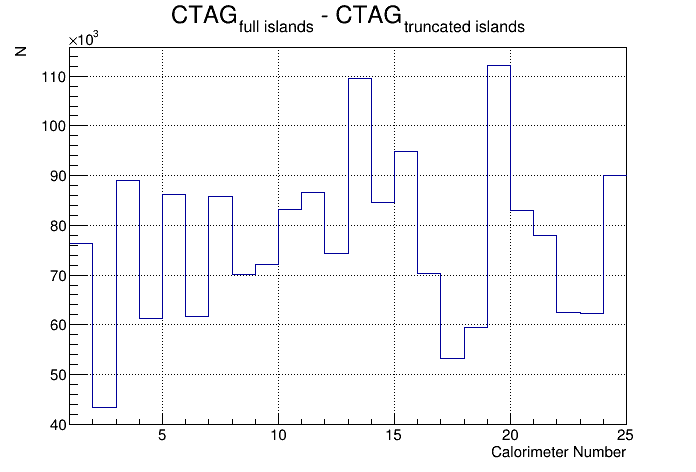

In [27]:
c = r.TCanvas()
#ctagdiff.GetYaxis().SetRangeUser(-10,10)
ctagdiff.Draw("")
c.SetGrid()
c.Draw()

---

# Aaron's Clustering

In [28]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")
clustersTrunc = f.Get("clustersAndCoincidencesTrunc").Get("clusters").Clone("clustersTrunc")

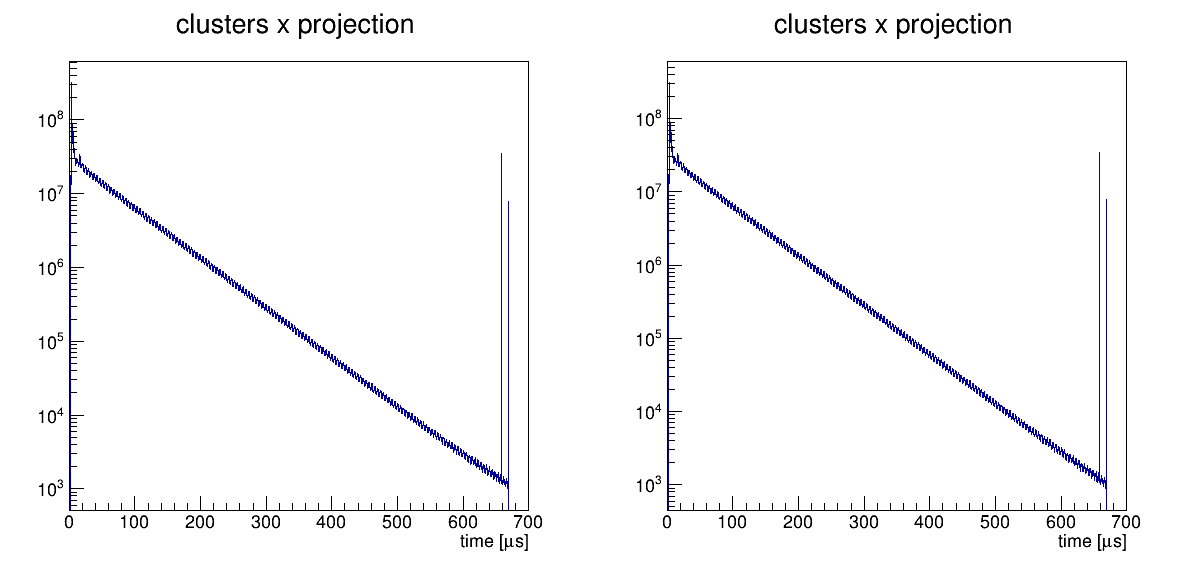

In [29]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
clusters.Project3D("x").Draw()
r.gPad.SetLogy()

c.cd(2)
clustersTrunc.Project3D("x").Draw()
r.gPad.SetLogy()

c.Draw()

In [30]:
clusters_x_diff = clusters.Project3D("x").Clone()
clusters_x_diff.Add(clustersTrunc.Project3D("x"), -1)

True

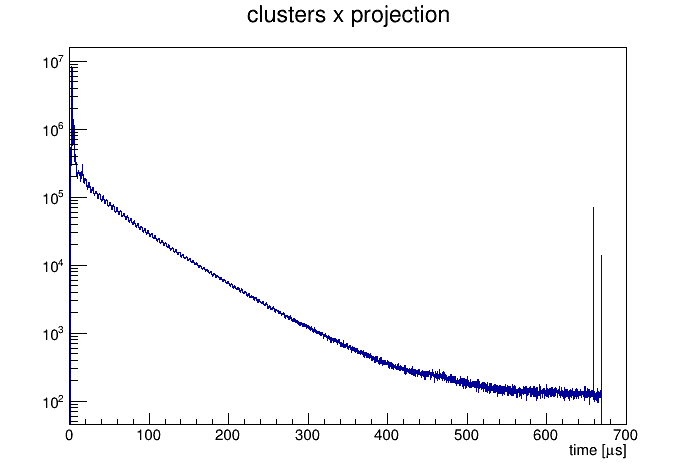

In [31]:
c = r.TCanvas()
clusters_x_diff.Draw()
c.SetLogy()
c.Draw()

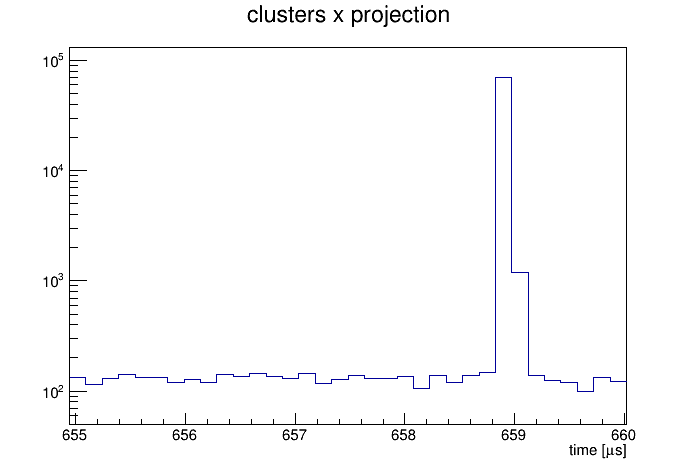

In [32]:
clusters_x_diff.GetXaxis().SetRangeUser(655,660)
c.Draw()

---

# Direct cluster comparison

In [33]:
counterHist = f.Get("clusterCompare").Get("counterHist").Clone()

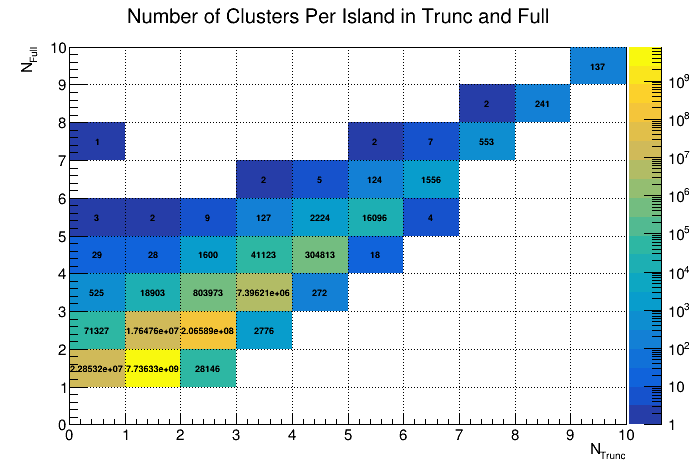

In [34]:
c = r.TCanvas()
counterHist.Draw("COLZ text")
counterHist.GetXaxis().SetRangeUser(0,10)
counterHist.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

In [35]:
evwDeltaEAll = f.Get("clusterCompare").Get("evwDeltaEAll").Clone()

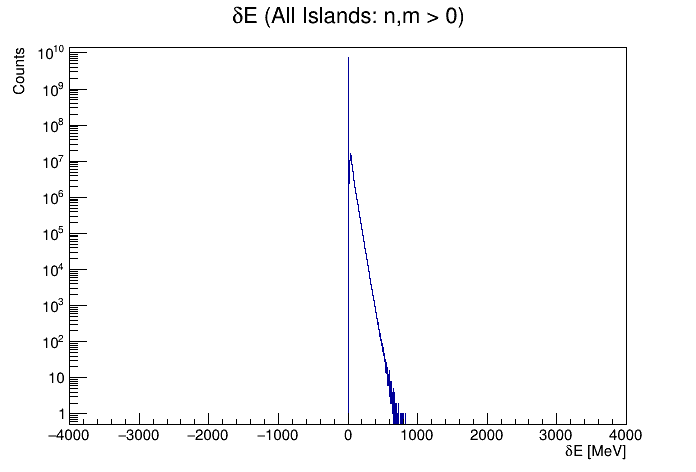

In [36]:
c = r.TCanvas()
evwDeltaEAll.Draw()
c.SetLogy()
c.Draw()

In [37]:
evwEnergyEvW = f.Get("clusterCompare").Get("evwEnergyEvW").Clone()
evwEnergyEvW.Rebin2D(1,1)

<ROOT.TH2D object ("evwEnergyEvW") at 0x7ffff0af4b70>

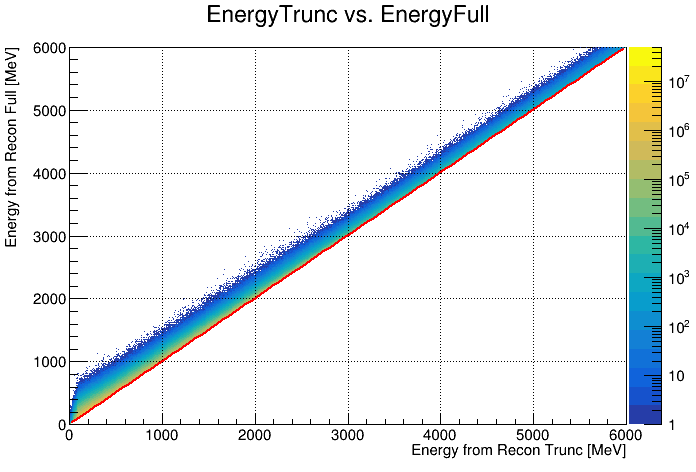

In [147]:
c = r.TCanvas()
evwEnergyEvW.Draw("colz")
#c.SetLogx()
#c.SetLogy()
c.SetLogz()

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.Draw("same")

c.SetGrid()

c.Draw()

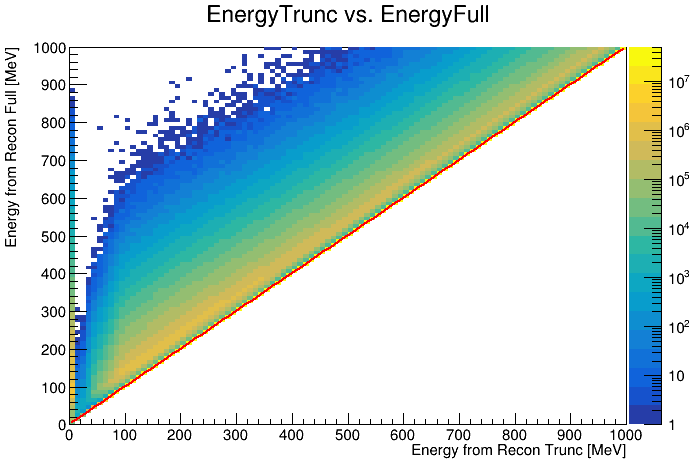

In [39]:
c = r.TCanvas()
evwEnergyEvW.GetYaxis().SetRangeUser(0,1000)
evwEnergyEvW.GetXaxis().SetRangeUser(0,1000)
evwEnergyEvW.Draw("colz")
#c.SetLogx()
#c.SetLogy()
c.SetLogz()

onetoone.Draw("same")

c.Draw()

In [40]:
counterFullVsTime = f.Get("clusterCompare").Get("counterFullVsTime").Clone()
counterTruncVsTime = f.Get("clusterCompare").Get("counterTruncVsTime").Clone()

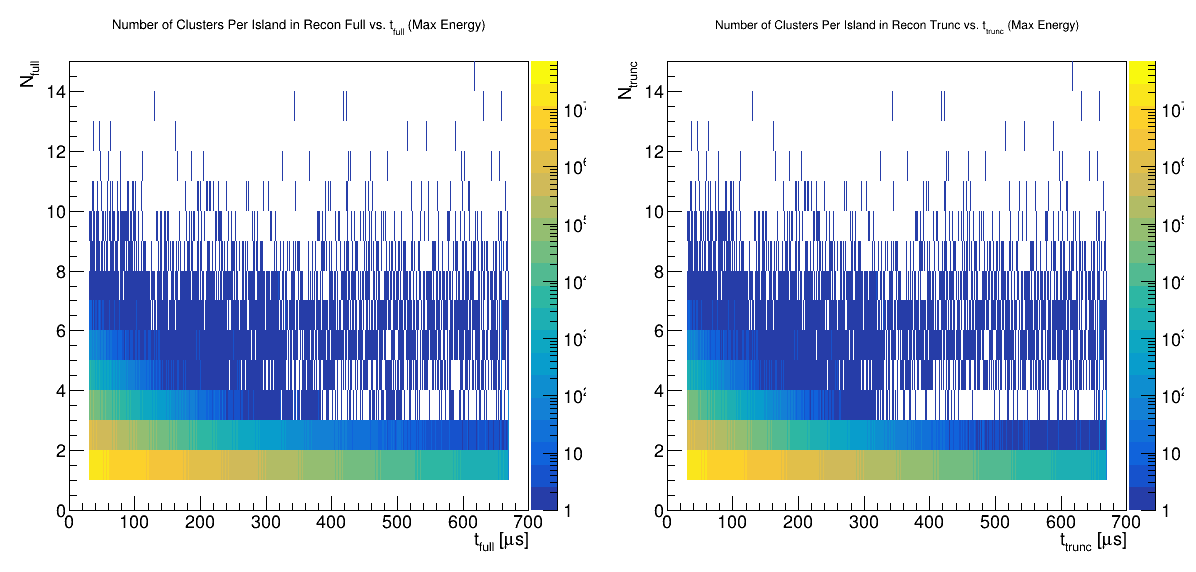

In [54]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
counterFullVsTime.Draw("colz")
r.gPad.SetLogz()

c.cd(2)
counterTruncVsTime.Draw("colz")
r.gPad.SetLogz()

c.Draw()

In [130]:
evwEnergyEvW.GetXaxis().UnZoom()
evwEnergyEvW.GetYaxis().UnZoom()
evwEnergyEvW_y = evwEnergyEvW.ProfileX().Clone()

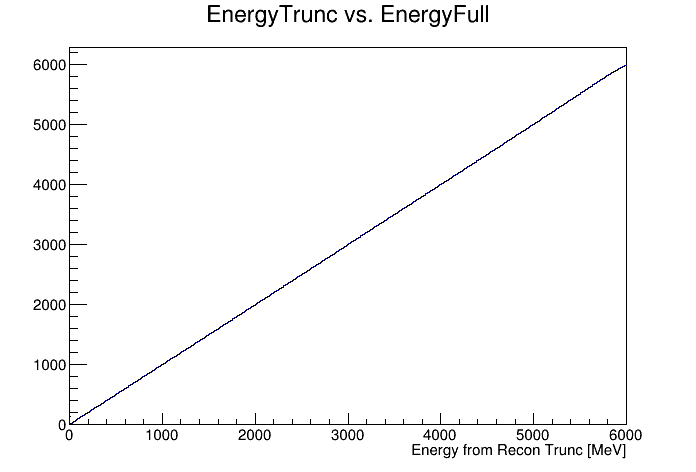

In [131]:
c = r.TCanvas()
evwEnergyEvW_y.Draw()
c.Draw()

In [132]:
evwEnergyEvW_y.GetBinContent(20)

200.84116316399985

In [143]:
evwEnergyEvW_ratio = evwEnergyEvW.ProjectionY().Clone("evwEnergyEvW_ratio")
evwEnergyEvW_ratio.Reset()
evwEnergyEvW_ratio.SetTitle("Ratio of #bar{E}_{full} to E_{trunc} vs. E_{trunc}; E_{trunc} [MeV]; E_{full} / E_{trunc}")

In [144]:
for i in range(evwEnergyEvW_y.GetNbinsX() + 1):
    binCenter = evwEnergyEvW.GetYaxis().GetBinCenter(i)
    binContent = evwEnergyEvW_y.GetBinContent(i)
    binError = evwEnergyEvW_y.GetBinError(i)
    #print(binContent, binCenter)
    evwEnergyEvW_ratio.SetBinContent(i, binContent / binCenter)
    evwEnergyEvW_ratio.SetBinError(i, binError / binCenter)

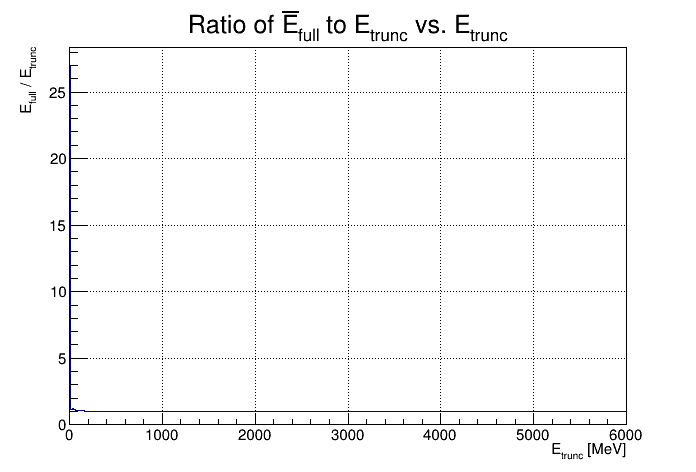

In [145]:
c = r.TCanvas()
evwEnergyEvW_ratio.Draw("hist e")
#c.SetLogy()
c.SetGrid()
c.Draw()

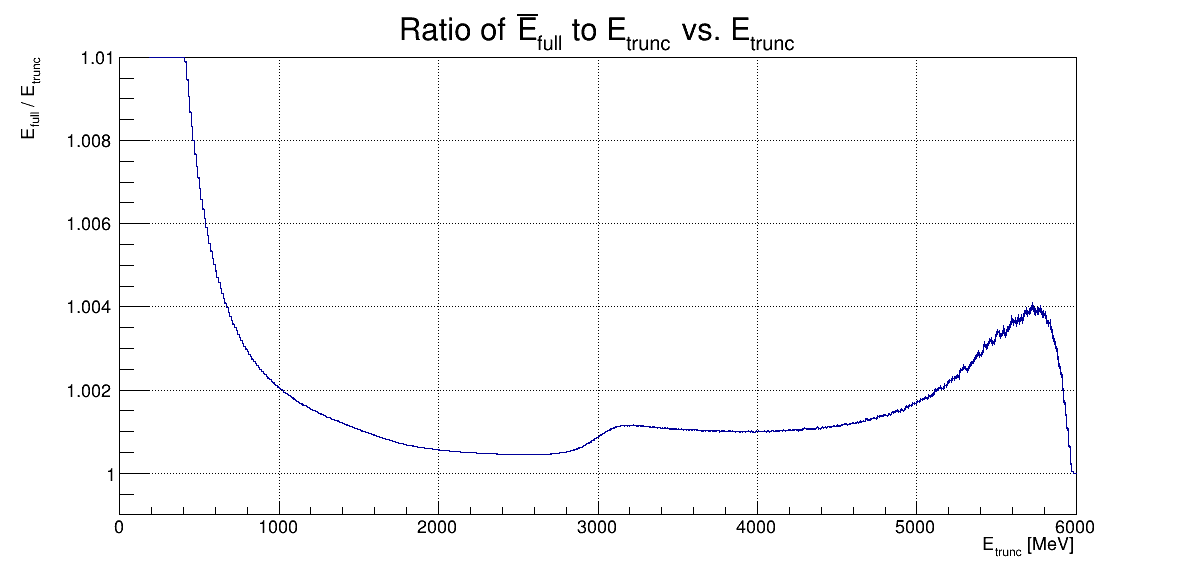

In [146]:
c = r.TCanvas("c","c",1200,600)
evwEnergyEvW_ratio.GetYaxis().SetRangeUser(0.999,1.01)
evwEnergyEvW_ratio.Draw("hist e")
c.SetGrid()
c.Draw()